In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
import numpy as np
from skimage.measure import profile_line
from scipy import sparse
from pymatreader import read_mat
import pandas as pd
import cProfile
from util import get_path
from extract_graph import dic_to_sparse,  from_sparse_to_graph, clean
import networkx as nx
from random import randrange
import math 
root_path = r'//sun.amolf.nl/shimizu-data/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE'
date_plate = '/20200701_1957_Plate13'
end  = '/Img'
endskeleton = '/Analysis/Skeleton.mat'
imname = '/Img_r09_c12.tif'


In [3]:
plate=13
date1='0703_1157'
date2='0703_1557'
date3='0703_1957'
row=6
column=10

In [4]:
def find_width(p,threshold):
    problem=False
    arg = len(p)//2
    we_plot=randrange(1000)
    while  p[arg]<=threshold:
        if arg<=0:
#             we_plot=50
            problem=True
            break
        arg-=1
    begin = arg
    arg = len(p)//2
    while  p[arg]<=threshold:
        if arg>=len(p)-1:
#             we_plot=50
            problem=True
            break
        arg+=1
    end = arg
    return(begin,end,problem)

In [5]:
imtab1=np.load(f'Data/imbackrem_{date1}_{plate}_{row}_{column}.npy')
imtab2=np.load(f'Data/imbackrem_{date2}_{plate}_{row}_{column}.npy')
imtab3=np.load(f'Data/imbackrem_{date3}_{plate}_{row}_{column}.npy')
skeleton1=np.load(f'Data/skeletonized_{date1}_{plate}_{row}_{column}.npy')
skeleton2=np.load(f'Data/skeletonized_{date2}_{plate}_{row}_{column}.npy')
skeleton3=np.load(f'Data/skeletonized_{date3}_{plate}_{row}_{column}.npy')

In [23]:
from skimage._shared.utils import _validate_interpolation_order
from warnings import warn
from scipy import ndimage as ndi

In [24]:
def extract_width(graph_tab,imtab,size=10,width_factor=60):
#     def _line_profile_coordinates(src, dst, linewidth=1):
#         src_row, src_col = src = np.asarray(src, dtype=float)
#         dst_row, dst_col = dst = np.asarray(dst, dtype=float)
#         d_row, d_col = dst - src
#         theta = np.arctan2(d_row, d_col)

#         length = int(np.ceil(np.hypot(d_row, d_col) + 1))
#         # we add one above because we include the last point in the profile
#         # (in contrast to standard numpy indexing)
#         line_col = np.linspace(src_col, dst_col, length)
#         line_row = np.linspace(src_row, dst_row, length)

#         # we subtract 1 from linewidth to change from pixel-counting
#         # (make this line 3 pixels wide) to point distances (the
#         # distance between pixel centers)
#         col_width = (linewidth - 1) * np.sin(-theta) / 2
#         row_width = (linewidth - 1) * np.cos(theta) / 2
#         perp_rows = np.stack([np.linspace(row_i - row_width, row_i + row_width,
#                                           linewidth) for row_i in line_row])
#         perp_cols = np.stack([np.linspace(col_i - col_width, col_i + col_width,
#                                           linewidth) for col_i in line_col])
#         return np.stack([perp_rows, perp_cols])
#     def profile_line(image, src, dst, linewidth=1,
#                  order=None, mode=None, cval=0.0,
#                  *, reduce_func=np.mean):
#         order = _validate_interpolation_order(image.dtype, order)

#         if mode is None:
#             warn("Default out of bounds interpolation mode 'constant' is "
#                  "deprecated. In version 0.19 it will be set to 'reflect'. "
#                  "To avoid this warning, set `mode=` explicitly.",
#                  FutureWarning, stacklevel=2)
#             mode = 'constant'

#         perp_lines = _line_profile_coordinates(src, dst, linewidth=linewidth)
#         if image.ndim == 3:
#             pixels = [ndi.map_coordinates(image[..., i], perp_lines,
#                                           prefilter=order > 1,
#                                           order=order, mode=mode,
#                                           cval=cval) for i in
#                       range(image.shape[2])]
#             pixels = np.transpose(np.asarray(pixels), (1, 2, 0))
#         else:
#             pixels = ndi.map_coordinates(image, perp_lines, prefilter=order > 1,
#                                          order=order, mode=mode, cval=cval)
#         # The outputted array with reduce_func=None gives an array where the
#         # row values (axis=1) are flipped. Here, we make this consistent.
#         pixels = np.flip(pixels, axis=1)

#         if reduce_func is None:
#             intensities = pixels
#         else:
#             try:
#                 intensities = reduce_func(pixels, axis=1)
#             except TypeError:  # function doesn't allow axis kwarg
#                 intensities = np.apply_along_axis(reduce_func, arr=pixels, axis=1)

#         return intensities
    threshold=imtab.mean()-20
    width_doc = sparse.dok_matrix(imtab.shape, dtype=np.float32)
    problem_doc = sparse.dok_matrix(imtab.shape, dtype=np.float32)
    for index, row in graph_tab.iterrows():
        pixel_list_ex=row['pixel_list']
        for index in range(len(pixel_list_ex)):
            sub_list=pixel_list_ex[max(0,index-size):index+size]
            orientation=np.array(sub_list[0])-np.array(sub_list[-1])
            perpendicular = [1,-orientation[0]/orientation[1]] if orientation[1]!=0 else [0,1]
            perpendicular_norm=np.array(perpendicular)/np.sqrt(perpendicular[0]**2+perpendicular[1]**2)
            pivot=pixel_list_ex[index]
            point1=np.around(np.array(pivot)+width_factor*perpendicular_norm)
            point2=np.around(np.array(pivot)-width_factor*perpendicular_norm)
            point1=point1.astype(int)
            point2=point2.astype(int)
            image
            p = profile_line(imtab, point1, point2,mode='constant')
            problem=False
            arg = len(p)//2
            we_plot=randrange(1000)
            while  p[arg]<=threshold:
                if arg<=0:
        #             we_plot=50
                    problem=True
                    break
                arg-=1
            begin = arg
            arg = len(p)//2
            while  p[arg]<=threshold:
                if arg>=len(p)-1:
        #             we_plot=50
                    problem=True
                    break
                arg+=1
            end = arg
            width_doc[pivot]=math.dist(point1, point2)*(end-begin)/len(p)
            if problem:
                problem_doc[pivot]=True
#                 print(pixel_list_ex[index])
#                 print(point1,point2)
#                 plt.plot(p)
#                 plt.axvline(x=begin,color ="red")
#                 plt.axvline(x=end,color="red")
#                 plt.show()
    values=list(width_doc.values())
    mean = np.mean(values)
    std = np.std(values)
    mini = min(values)
    maxi = max(values)
    width_doc_normalised=sparse.dok_matrix(imtab.shape, dtype=np.float32)
    for key in width_doc.keys():
        width_doc_normalised[key]=(width_doc[key]-mini)/(maxi-mini)*255
    return(width_doc_normalised,width_doc,problem_doc,mini,maxi)
            

In [21]:
clean_skeleton_2=clean(skeleton2)
doc_skeleton_2=sparse.dok_matrix(clean_skeleton_2)
graph_tab2=from_sparse_to_graph(doc_skeleton_2)

In [25]:
width_doc_normalised2,width_doc2,problem_doc2,mini,maxi=extract_width(graph_tab2,imtab2,width_factor=30)

In [27]:
np.save(f'Data/width_{date2}_{plate}_{row}_{column}',width_doc2.todense())


In [ ]:
cProfile.run('extract_width(graph_tab2,imtab2,width_factor=30)')

In [5]:
clean_skeleton_1=clean(skeleton1)
doc_skeleton_1=sparse.dok_matrix(clean_skeleton_1)
graph_tab1=from_sparse_to_graph(doc_skeleton_1)

(array([   9.,   35.,   83.,  430., 1542., 2419., 2168., 2501.,  829.,
         110.,  150.,   88.,   87.,   74.,   37.,   34.,   17.,    9.,
           8.,   28.]),
 array([  4.3706183,  16.902088 ,  29.433556 ,  41.965027 ,  54.496494 ,
         67.02796  ,  79.55943  ,  92.090904 , 104.62237  , 117.15384  ,
        129.6853   , 142.21678  , 154.74825  , 167.27971  , 179.81119  ,
        192.34265  , 204.87413  , 217.4056   , 229.93706  , 242.46854  ,
        255.       ], dtype=float32),
 <BarContainer object of 20 artists>)

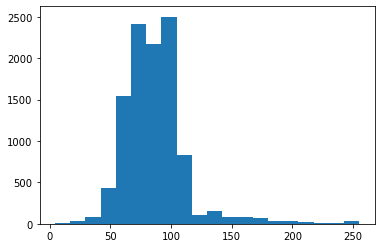

In [67]:
plt.hist(list(width_doc_normalised2.values()),20)

In [ ]:
for index, row in graph_tab.iterrows():
    pixel_list_ex=row['pixel_list']

In [11]:
plt.scatter(np.array(pixel_list_ex))

TypeError: scatter() missing 1 required positional argument: 'y'

In [68]:
len(pixel_list_ex)

19

In [69]:
index=18

In [70]:
sub_list=pixel_list_ex[max(0,index-size):index+size]

In [34]:
sub_list

[(37, 2625), (36, 2625), (35, 2626), (34, 2626), (33, 2627)]

In [35]:
orientation=np.array(sub_list[0])-np.array(sub_list[-1])

In [36]:
perpendicular = [1,-orientation[1]/orientation[0]] if orientation[0]!=0 else [0,1]

In [37]:
perpendicular_norm=np.array(perpendicular)/np.sqrt(perpendicular[0]**2+perpendicular[1]**2)

In [38]:
perpendicular_norm

array([0.89442719, 0.4472136 ])

In [58]:
width_factor=30
point1=np.around(np.array(pixel_list_ex[index])+width_factor*perpendicular_norm)
point2=np.around(np.array(pixel_list_ex[index])-width_factor*perpendicular_norm)


In [63]:
point1=point1.astype(int)
point2=point2.astype(int)

In [35]:
# point1 = (640,1240)
# point2 = (632,1326)
point1 = (1700,1315)
point2 = (1681,1350)
p = profile_line(imtab1, point1, point2)

<ipython-input-35-121aff8c34d6>:5: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.
  p = profile_line(imtab1, point1, point2)


In [36]:
p

array([168.27086898, 173.5342875 , 175.8154637 , 176.6710102 ,
       175.06077527, 177.67013188, 180.31828932, 175.51232312,
       173.6585763 , 176.38195614, 174.20520451, 176.80656912,
       174.98610196, 175.05931109, 175.64986478, 173.98557711,
       179.28103789, 181.80919336, 179.63244174, 182.08738808,
       180.06193533, 177.606989  , 178.81249943, 173.26324697,
       170.22262756, 169.76385031, 171.88203462, 170.85649665,
       167.99902209, 166.90774842, 164.13833834, 166.82529663,
       169.55105576, 166.50518968, 167.55281241, 172.91702877,
       175.37118201, 172.70362414, 176.43422867, 172.70525089,
       174.44044381])

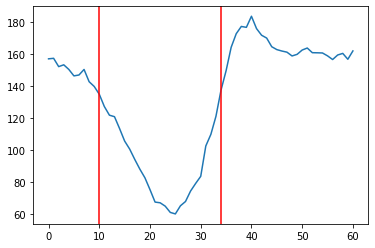

In [66]:
plt.plot(p)
begin,end = find_width(p)
plt.axvline(x=begin,color ="red")
plt.axvline(x=end,color="red")

In [16]:
xs=[]
ys=[]
for pixel in sub_list:
    xs.append(pixel[0])
    ys.append(pixel[1])

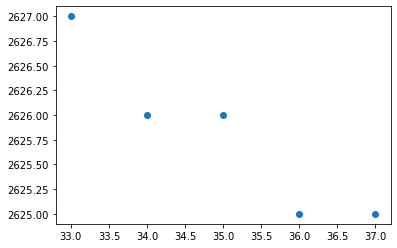

In [19]:
plt.scatter(xs,ys)